In [1]:
#hidden layer 5개 with 70 node, epoch=200
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv(r"C:\Juneinter\midterm_substitution.csv")

In [3]:
df

,Country Code,Series Code,growth(Y),inflation,debt,Trade,gov,capital,pop,class
0,KOR,1990,8.734757,10.108090,12.940,51.260999,11.006,39.615998,0.985130,2
1,KOR,1991,9.267071,9.484639,12.078,50.389280,11.562,41.374062,0.989786,2
2,KOR,1992,5.077884,7.743556,11.814,49.488560,12.118,38.485198,1.039161,1
3,KOR,1993,5.766866,6.196906,11.041,47.587396,12.674,37.479541,1.015821,2
4,KOR,1994,8.112865,8.102666,9.804,48.875494,13.230,38.539129,1.006157,2
5,KOR,1995,8.473632,6.939947,8.657,52.785124,13.786,39.003295,1.006201,2
6,KOR,1996,6.574239,4.255252,7.978,53.504380,14.342,39.680962,0.952779,2
7,KOR,1997,4.933581,4.065016,9.916,58.632978,14.192,37.424679,0.937714,1
8,KOR,1998,-6.151130,4.616319,14.197,69.987767,16.475,27.761895,0.721865,0
9,KOR,1999,10.520250,-1.184720,16.210,61.436074,16.607,30.916296,0.710795,2


In [4]:
x_data=df.iloc[:,3:9].values
y_data=df.iloc[:,[9]].values

def MinMaxScaler(data):
    numerator=data-np.min(data,0)
    denominator=np.max(data,0)-np.min(data,0)
    return numerator/(denominator+1e-7)

In [5]:
print(x_data.shape)
print(y_data.shape)

(29, 6)
(29, 1)


In [6]:
x_data=MinMaxScaler(x_data)
print(x_data)

#y_data=tf.one_hot(y_data, depth=3)
#y_data=y_data.numpy().reshape([-1,3])
y_data=np.array(y_data, np.float32)
print(y_data)

[[0.99999999 0.16707071 0.0588599  0.         0.87084612 0.93467924]
 [0.94479221 0.13804714 0.04489287 0.05950979 0.99999999 0.94030749]
 [0.79061597 0.12915825 0.03046118 0.11901959 0.78777341 0.99999988]
 [0.65365714 0.10313131 0.         0.17852938 0.71389414 0.97178307]
 [0.82241585 0.06148148 0.02063841 0.23803917 0.79173537 0.96009954]
 [0.71945485 0.02286195 0.08328002 0.29754896 0.82583469 0.96015226]
 [0.48171996 0.         0.09480422 0.35705876 0.87561867 0.89556839]
 [0.46487419 0.06525253 0.17697664 0.34100396 0.70986377 0.87735481]
 [0.51369313 0.20939394 0.3589075  0.58535802 0.         0.61640429]
 [0.         0.27717172 0.22188893 0.59948624 0.23173389 0.60302069]
 [0.1839458  0.29306397 0.32621262 0.60012843 0.38052867 0.7546065 ]
 [0.41297887 0.31148148 0.26154417 0.70116664 0.27899245 0.67126254]
 [0.37355042 0.30515151 0.20134236 0.5839666  0.23344449 0.44242694]
 [0.41032418 0.39814815 0.2532435  0.80477362 0.31244213 0.37033018]
 [0.38188449 0.48632996 0.40334271

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.3, random_state=2020)
print(x_train.shape)   #train data size=21
print(x_test.shape)    #test data size=8
print(y_train.shape)

(20, 6)
(9, 6)
(20, 1)


In [8]:
model=Sequential()
model.add(Dense(70, activation="relu", input_dim=6))
model.add(Dropout(0.2))
model.add(Dense(70, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(70, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(70, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(70, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                490       
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dropout_1 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 70)                4970      
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 70)                4

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#es=EarlyStopping(monitor="val_loss", mode="min", patience=15)
history=model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), verbose=2)#, callbacks=[es])

Train on 20 samples, validate on 9 samples
Epoch 1/200
20/20 - 0s - loss: 1.1023 - accuracy: 0.3000 - val_loss: 1.1245 - val_accuracy: 0.1111
Epoch 2/200
20/20 - 0s - loss: 1.0954 - accuracy: 0.4000 - val_loss: 1.1302 - val_accuracy: 0.1111
Epoch 3/200
20/20 - 0s - loss: 1.0968 - accuracy: 0.3000 - val_loss: 1.1363 - val_accuracy: 0.1111
Epoch 4/200
20/20 - 0s - loss: 1.0651 - accuracy: 0.4500 - val_loss: 1.1415 - val_accuracy: 0.1111
Epoch 5/200
20/20 - 0s - loss: 1.0769 - accuracy: 0.4000 - val_loss: 1.1464 - val_accuracy: 0.1111
Epoch 6/200
20/20 - 0s - loss: 1.0711 - accuracy: 0.4000 - val_loss: 1.1527 - val_accuracy: 0.1111
Epoch 7/200
20/20 - 0s - loss: 1.1065 - accuracy: 0.4500 - val_loss: 1.1574 - val_accuracy: 0.1111
Epoch 8/200
20/20 - 0s - loss: 1.0670 - accuracy: 0.4000 - val_loss: 1.1605 - val_accuracy: 0.1111
Epoch 9/200
20/20 - 0s - loss: 1.0626 - accuracy: 0.4500 - val_loss: 1.1633 - val_accuracy: 0.1111
Epoch 10/200
20/20 - 0s - loss: 1.0417 - accuracy: 0.4500 - val_lo

Epoch 83/200
20/20 - 0s - loss: 0.7310 - accuracy: 0.7000 - val_loss: 0.9732 - val_accuracy: 0.5556
Epoch 84/200
20/20 - 0s - loss: 0.6957 - accuracy: 0.6000 - val_loss: 0.9737 - val_accuracy: 0.6667
Epoch 85/200
20/20 - 0s - loss: 0.6321 - accuracy: 0.8000 - val_loss: 0.9783 - val_accuracy: 0.6667
Epoch 86/200
20/20 - 0s - loss: 0.7244 - accuracy: 0.7000 - val_loss: 0.9846 - val_accuracy: 0.6667
Epoch 87/200
20/20 - 0s - loss: 0.5132 - accuracy: 0.7000 - val_loss: 0.9976 - val_accuracy: 0.6667
Epoch 88/200
20/20 - 0s - loss: 0.7081 - accuracy: 0.7000 - val_loss: 1.0106 - val_accuracy: 0.6667
Epoch 89/200
20/20 - 0s - loss: 0.6493 - accuracy: 0.6500 - val_loss: 1.0198 - val_accuracy: 0.6667
Epoch 90/200
20/20 - 0s - loss: 0.6830 - accuracy: 0.6500 - val_loss: 1.0389 - val_accuracy: 0.5556
Epoch 91/200
20/20 - 0s - loss: 0.7138 - accuracy: 0.6000 - val_loss: 1.0402 - val_accuracy: 0.5556
Epoch 92/200
20/20 - 0s - loss: 0.6548 - accuracy: 0.8000 - val_loss: 1.0403 - val_accuracy: 0.6667


Epoch 165/200
20/20 - 0s - loss: 0.4998 - accuracy: 0.8500 - val_loss: 1.2227 - val_accuracy: 0.6667
Epoch 166/200
20/20 - 0s - loss: 0.5090 - accuracy: 0.8000 - val_loss: 1.2222 - val_accuracy: 0.6667
Epoch 167/200
20/20 - 0s - loss: 0.6267 - accuracy: 0.8000 - val_loss: 1.2576 - val_accuracy: 0.6667
Epoch 168/200
20/20 - 0s - loss: 0.4520 - accuracy: 0.8000 - val_loss: 1.2930 - val_accuracy: 0.6667
Epoch 169/200
20/20 - 0s - loss: 0.4700 - accuracy: 0.7500 - val_loss: 1.3194 - val_accuracy: 0.6667
Epoch 170/200
20/20 - 0s - loss: 0.5925 - accuracy: 0.7000 - val_loss: 1.3617 - val_accuracy: 0.6667
Epoch 171/200
20/20 - 0s - loss: 0.5340 - accuracy: 0.7500 - val_loss: 1.3670 - val_accuracy: 0.6667
Epoch 172/200
20/20 - 0s - loss: 0.4670 - accuracy: 0.8000 - val_loss: 1.3890 - val_accuracy: 0.6667
Epoch 173/200
20/20 - 0s - loss: 0.4458 - accuracy: 0.8000 - val_loss: 1.4023 - val_accuracy: 0.6667
Epoch 174/200
20/20 - 0s - loss: 0.6026 - accuracy: 0.7000 - val_loss: 1.4459 - val_accurac

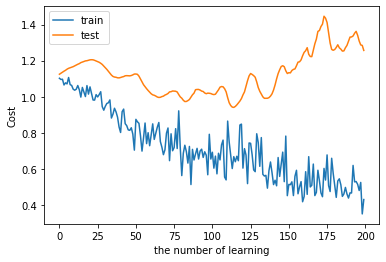

In [10]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.xlabel("the number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [11]:
train_acc=model.evaluate(x_train, y_train, verbose=0)
print("train accuracy:", train_acc[1])
test_acc=model.evaluate(x_test, y_test, verbose=0)
print("test accuracy:", test_acc[1])

train accuracy: 0.85
test accuracy: 0.6666667
